In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
derma_ds = pd.read_csv('C:/Users/welcome/Desktop/ML/Mod4/dermatology.data',header=None)
derma_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
0     366 non-null int64
1     366 non-null int64
2     366 non-null int64
3     366 non-null int64
4     366 non-null int64
5     366 non-null int64
6     366 non-null int64
7     366 non-null int64
8     366 non-null int64
9     366 non-null int64
10    366 non-null int64
11    366 non-null int64
12    366 non-null int64
13    366 non-null int64
14    366 non-null int64
15    366 non-null int64
16    366 non-null int64
17    366 non-null int64
18    366 non-null int64
19    366 non-null int64
20    366 non-null int64
21    366 non-null int64
22    366 non-null int64
23    366 non-null int64
24    366 non-null int64
25    366 non-null int64
26    366 non-null int64
27    366 non-null int64
28    366 non-null int64
29    366 non-null int64
30    366 non-null int64
31    366 non-null int64
32    366 non-null int64
33    366 non-null object
34    366 non-null int64
dtypes: int64(34), 

In [3]:
derma_ds[33] = pd.to_numeric(derma_ds[33], errors='coerce').fillna(0).astype(int)
derma_ds[33] = derma_ds[33].replace(to_replace=0,value=int(derma_ds[33].mean()))

In [4]:
#Spilitting the DATA
x = derma_ds.iloc[:, 0:34].values
y = derma_ds.iloc[:,34].values
print(x,y)

[[ 2  2  0 ...  1  0 55]
 [ 3  3  3 ...  1  0  8]
 [ 2  1  2 ...  2  3 26]
 ...
 [ 3  2  2 ...  2  3 28]
 [ 2  1  3 ...  2  3 50]
 [ 3  2  2 ...  3  0 35]] [2 1 3 1 3 2 5 3 4 4 1 2 2 1 3 4 2 1 3 5 6 2 5 3 5 1 6 5 2 3 1 2 1 1 4 2 3
 2 3 1 2 4 1 2 5 3 4 6 2 3 3 4 1 1 5 1 2 3 4 2 6 1 5 1 2 3 1 4 5 1 2 6 3 5
 4 2 2 1 3 5 1 2 2 2 5 1 1 3 1 4 2 2 5 1 3 4 2 5 1 6 2 5 1 2 2 1 4 1 3 1 1
 3 5 3 3 5 2 3 4 1 2 5 6 1 1 2 6 3 5 4 1 1 3 5 5 1 4 2 3 1 2 1 1 3 3 3 2 5
 4 2 2 1 1 1 5 3 2 3 2 2 4 2 3 6 2 1 1 3 4 3 3 1 1 1 3 1 1 2 3 3 1 1 1 1 6
 2 2 2 2 1 3 3 3 1 1 2 3 2 2 2 5 5 5 5 5 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4
 5 5 5 5 5 5 5 2 2 2 2 1 1 1 1 1 1 6 6 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 4 4 4
 4 4 4 5 5 5 5 6 6 6 4 4 4 1 1 1 1 1 2 2 4 4 4 1 1 2 2 2 3 3 3 3 1 1 1 1 5
 5 5 5 5 3 3 3 4 1 1 4 4 4 1 1 1 3 3 3 3 3 1 1 1 1 4 4 1 1 4 3 3 4 1 1 4 4
 5 5 1 1 5 5 3 1 5 5 6 6 4 4 6 6 6 1 1 1 5 5 1 1 1 1 2 2 4 4 3 3 1]


In [5]:
variance = np.var(x,axis=0)
var_copy = sorted(variance)
print("index\t variance")
for i in range(34):
    for j in range(34):
        if var_copy[i]==variance[j]:
            print(j+1,"\t",var_copy[i])
            break

index	 variance
11 	 0.10988682851085431
13 	 0.1691077667293738
30 	 0.2023350951058556
31 	 0.23819761712801218
7 	 0.3246812386156649
1 	 0.4406894801278032
23 	 0.44844575830869843
2 	 0.4907954850846546
17 	 0.5062856460330258
32 	 0.5257920511212638
18 	 0.571657857804055
24 	 0.5755994505658574
14 	 0.6631431216220252
8 	 0.693899489384574
25 	 0.7195198423362896
15 	 0.7258577443339604
26 	 0.7460061512735525
12 	 0.7545164083728986
10 	 0.8179402191764463
3 	 0.8213517871539907
5 	 0.8222401385529577
19 	 0.8396189793663593
29 	 0.9090447609662875
27 	 0.9092911105139002
6 	 0.9139717519185404
9 	 0.963607453193586
22 	 1.06814177789722
20 	 1.1138358864104634
16 	 1.2164068798710022
33 	 1.2196915405058377
28 	 1.2737988593269431
4 	 1.2921854937442145
21 	 1.3469273492788678
34 	 225.50456119919974


In [6]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [7]:
x1 = pd.DataFrame(x)
mi = mutual_info_classif(x1,y)
len(mi)

34

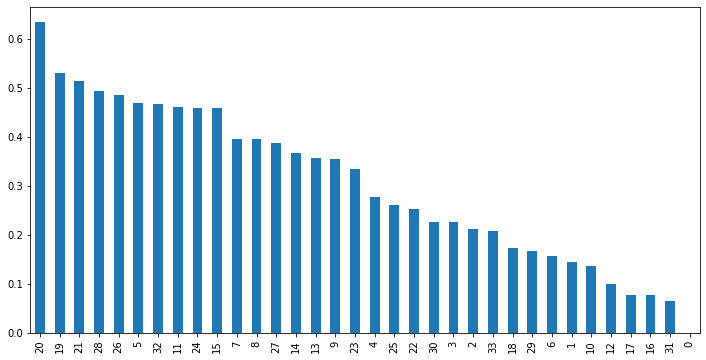

In [8]:
mi = pd.Series(mi)
mi.index = x1.columns
mi.sort_values(ascending=False, inplace = True)
mi.plot.bar(figsize = (12,6))

In [9]:
sel = SelectPercentile(mutual_info_classif, percentile=50).fit(x1,y)
x1.columns[sel.get_support()]
x_mi = sel.transform(x1)
model = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(x_mi,y)
y_pred = model.predict(x_mi)
print('Accuracy : ',accuracy_score(y, y_pred))

Accuracy :  0.9508196721311475
